In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [11]:
# read in the data
df = pd.read_csv('epa-sea-level.csv')


print(df.head(10))
df.info() #all floats / only 21 non null for noaa
df.describe() #no nulls

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   
5  1885                  0.531496          -0.330709           1.393701   
6  1886                  0.437008          -0.381890           1.255906   
7  1887                  0.216535          -0.602362           1.035433   
8  1888                  0.299213          -0.519685           1.118110   
9  1889                  0.362205          -0.456693           1.181102   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

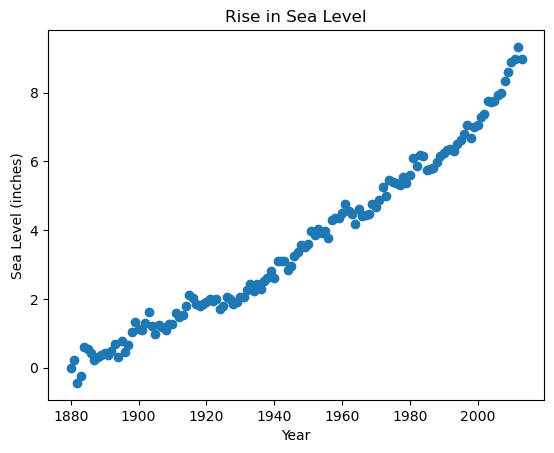

In [14]:
#create a scatter plot 
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.show()


* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
* Plot the line of best fit over the top of the scatter plot. 
* Make the line go through the year 2050 to predict the sea level rise in 2050.

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64


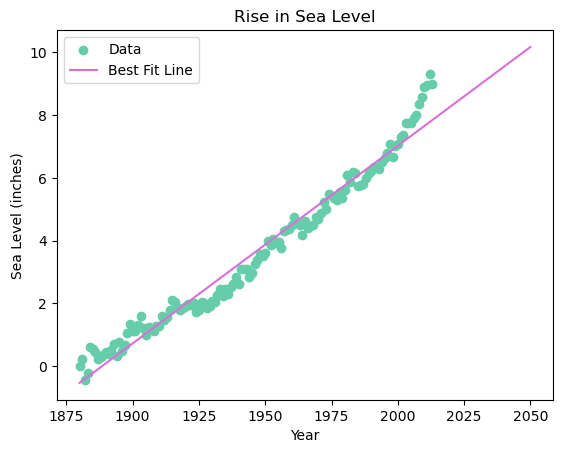

In [39]:
#calculate the line of best fit for the data
slope, intercept, r_value, p_value, std_err =linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

#extend the x axis to 2050
years_extended = pd.Series(range(1880, 2051))
print(years_extended)
#calculate the y values for the extended x axis
y_values_extended = slope * years_extended + intercept

#calculate the line of best fit for the extended data
#slope_extended, intercept_extended, r_value_extended, p_value_extended, std_err_extended = linregress(y_values_extended, years_extended)

#plot the line of best fit
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='mediumaquamarine')
plt.plot(years_extended, slope * years_extended + intercept, color='orchid', label='Best Fit Line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend(['Data', 'Best Fit Line'])
plt.show()

* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
* Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

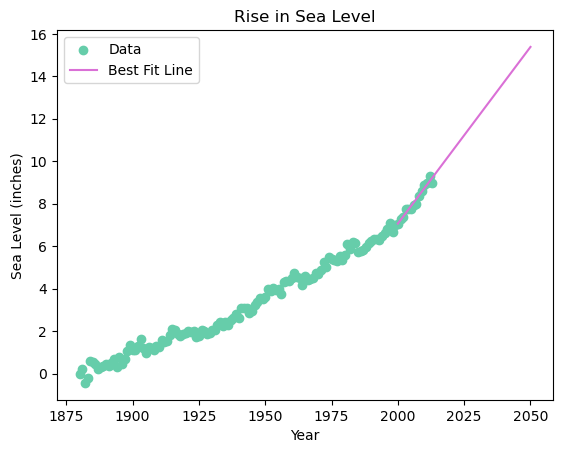

In [42]:
#calculate the line of best fit for the data from 2000 onwards
slope, intercept, r_value, p_value, std_err =linregress(df.loc[df['Year']>=2000,'Year'], df.loc[df['Year']>=2000, 'CSIRO Adjusted Sea Level'])

#extend the x axis to 2050
years_extended = pd.Series(range(2000, 2051))
#calculate the y values for the extended x axis
y_values_extended = slope * years_extended + intercept

#plot the line of best fit
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='mediumaquamarine')
plt.plot(years_extended, slope * years_extended + intercept, color='orchid', label='Best Fit Line')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend(['Data', 'Best Fit Line'])
plt.show()